In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df = pd.read_csv("commodity-futures-trading-anomaly-detection.csv")

In [4]:
# Convert Date to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [5]:
# Selecting features for training (excluding non-relevant columns)
features = [
    'Market_participation', 'Producer_merchant_processor_user_longs', 'Producer_merchant_processor_user_shorts',
    'Swap_dealer_longs', 'Swap_dealer_shorts', 'Swap_dealer_spreads', 'Money_manager_longs',
    'Money_manager_shorts', 'Money_manager_spreads', 'Other_reportable_longs', 'Other_reportable_shorts',
    'Other_reportable_spreads', 'Total_reportable_longs', 'Total_reportable_shorts', 'Non_reportable_longs',
    'Non_reportable_shorts', 'GOLD', 'Net_Producer_Pos', 'Net_Swap_Dealer_Pos', 'Net_Money_Manager_Pos',
    'Net_Other_Reportable_Pos', 'SMA_10', 'SMA_50', 'Turning_Point', 'Trader_Cluster'
]

In [6]:
# Target variable (Price_Change)
target = 'Price_Change'

In [7]:
df.shape

(371, 31)

In [8]:
columns = []
for column in df.columns:
    columns.append({"Column":column, "Type": df[column].dtype})
columns_df = pd.DataFrame(columns)
columns_df

,Column,Type
0,Id,int64
1,Market_participation,float64
2,Producer_merchant_processor_user_longs,float64
3,Producer_merchant_processor_user_shorts,float64
4,Swap_dealer_longs,float64
5,Swap_dealer_shorts,float64
6,Swap_dealer_spreads,float64
7,Money_manager_longs,float64
8,Money_manager_shorts,float64
9,Money_manager_spreads,float64


In [9]:
# Handle missing values (fill with mean)
df[features] = df[features].fillna(df[features].mean())

In [10]:
df.shape

(371, 31)

In [11]:
# Normalize features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

In [13]:
# Normalize target separately
target_scaler = MinMaxScaler()
df[target] = target_scaler.fit_transform(df[[target]])

In [14]:
print("Dataset Shape:", df.shape)
df.head().T

Dataset Shape: (371, 31)


Date,2010-12-19,2010-12-26,2011-01-02,2011-01-09,2011-01-16
Id,0,1,2,3,4
Market_participation,0.169759,0.184525,0.188694,0.154148,0.169311
Producer_merchant_processor_user_longs,0.071338,0.082811,0.082807,0.065685,0.059948
Producer_merchant_processor_user_shorts,0.254681,0.265574,0.271828,0.248476,0.261634
Swap_dealer_longs,0.710004,0.720705,0.720691,0.706544,0.695735
Swap_dealer_shorts,0.301287,0.285999,0.292106,0.301307,0.260474
Swap_dealer_spreads,0.806335,0.80139,0.801365,0.729527,0.819268
Money_manager_longs,0.150935,0.150935,0.150935,0.150935,0.172146
Money_manager_shorts,0.156996,0.156996,0.156996,0.156996,0.156996
Money_manager_spreads,0.138382,0.138347,0.138347,0.138382,0.138382


In [15]:
def create_sequences(data, target_col, window_size=30):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])  # Take past `window_size` days as input
        y.append(data[i + window_size][target_col])  # Next day's Price_Change
    return np.array(X), np.array(y)

In [16]:
# Convert dataframe to numpy array
data_np = df[features + [target]].values

In [17]:
data_np.shape

(371, 26)

In [18]:
# Define time window size (e.g., 30 past days)
window_size = 30

In [19]:
# Create sequences
X, y = create_sequences(data_np, target_col=-1, window_size=window_size)  # Target is last column

In [20]:
# Train-Test Split (80-20)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [21]:
X_train = X_train[:, :, :25]  # Keep only first 25 features
X_test = X_test[:, :, :25]

In [22]:
shapes = []

shapes.append({"label": "X shape", "shape": X.shape})
shapes.append({"label": "Y shape", "shape": y.shape})
shapes.append({"label": "Train shape", "shape": X_train.shape})
shapes.append({"label": "Test shape", "shape": X_test.shape})

shapes_df = pd.DataFrame(shapes)

In [23]:
shapes_df

,label,shape
0,X shape,"(341, 30, 26)"
1,Y shape,"(341,)"
2,Train shape,"(272, 30, 25)"
3,Test shape,"(69, 30, 25)"


In [24]:
shapes_df.to_csv(r"Data/commodity-futures-trading-anomaly-detection-predict-price-change-shapes.csv")

In [25]:
print(len(features))

25


In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Bidirectional

In [27]:
# Build LSTM Model
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True, activation='tanh'), input_shape=(window_size, len(features))),
    Dropout(0.2),
    Bidirectional(LSTM(32, return_sequences=False, activation='tanh')),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)  # Regression output
])

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [29]:
# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - loss: 0.1977 - mae: 0.3626 - val_loss: 0.0128 - val_mae: 0.0952
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0409 - mae: 0.1624 - val_loss: 0.0211 - val_mae: 0.1196
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0266 - mae: 0.1265 - val_loss: 0.0078 - val_mae: 0.0726
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0299 - mae: 0.1362 - val_loss: 0.0136 - val_mae: 0.0900
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0191 - mae: 0.1101 - val_loss: 0.0080 - val_mae: 0.0736
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0207 - mae: 0.1143 - val_loss: 0.0092 - val_mae: 0.0771
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0215 - mae: 0.1133 - val_loss: 0.0101 - val_mae: 0.0800
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0204 - mae: 0.1125 - val_loss: 0.0098 - val_mae: 0.0788
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0189 - mae: 0.1060 -

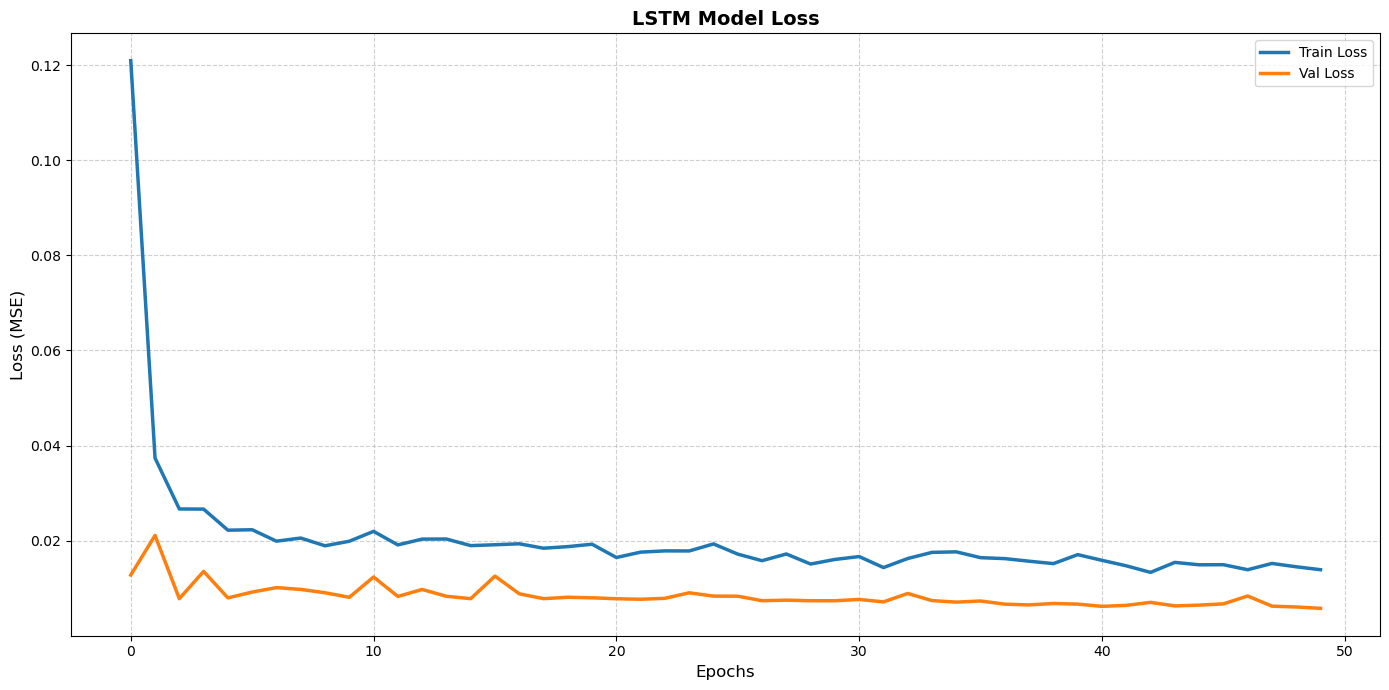

In [30]:
plt.figure(figsize=(14, 7))  # Slightly larger figure for better readability
plt.plot(history.history['loss'], label='Train Loss', linewidth=2.5)
plt.plot(history.history['val_loss'], label='Val Loss', linewidth=2.5)
plt.title("LSTM Model Loss", fontsize=14, fontweight='bold')
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss (MSE)", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)  # Add a subtle grid
plt.tight_layout() #avoid labels being cutoff
plt.savefig("Plots/LSTM Model Loss.png", dpi=200)
plt.show()

In [31]:
# Predict on test set
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 403ms/step


In [32]:
# Rescale predictions back to original scale
y_test_rescaled = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_rescaled = target_scaler.inverse_transform(y_pred)

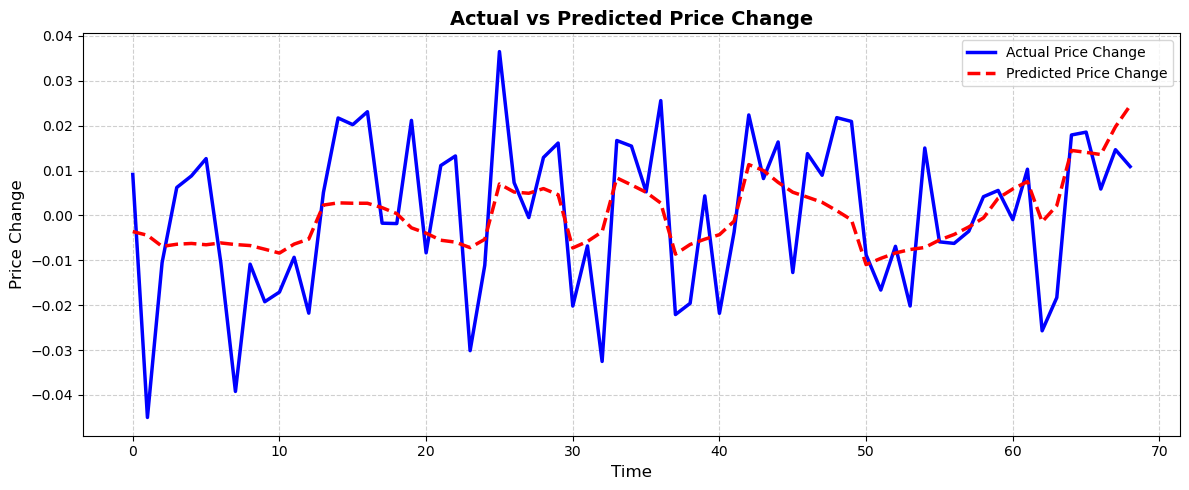

In [33]:
# Plot Actual vs. Predicted
plt.figure(figsize=(12, 5))
plt.plot(y_test_rescaled, label="Actual Price Change", color='blue', linewidth=2.5)
plt.plot(y_pred_rescaled, label="Predicted Price Change", color='red', linestyle='dashed', linewidth=2.5)
plt.title("Actual vs Predicted Price Change", fontsize=14, fontweight='bold')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Price Change", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)  # Add a subtle grid
plt.tight_layout() #avoid labels being cutoff
plt.savefig("Plots/Actual vs Predicted Price Change.png", dpi=200)
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

In [36]:
scores = []
scores.append({"Label": "RMSE", "Value": rmse})
scores.append({"Label": "R² Score", "Value": r2})

scores_df = pd.DataFrame(scores)

In [37]:
scores_df

,Label,Value
0,RMSE,0.014382
1,R² Score,0.292620


In [38]:
scores_df.to_csv(r"Data/commodity-futures-trading-anomaly-detection-predict-price-change-mse-r-score.csv")